# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Simple Feed-Forward Neural Network

The following class is an implementation of backpropagation on a simple neural network with 2 inputs in the input layer, 2 neurons in one hidden layer and 1 neuron in the output layer.

In [6]:
class SFFN:
    
    def __init__(self):
        self.w1=self.w2=self.w3=self.w4=self.w5=self.w6=None
        self.b1=self.b2=self.b3=None
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
  
    def forward_pass(self,x):
        x1,x2=x[0],x[1]
        a1=self.w1*x1+self.w2*x2+self.b1
        h1=self.sigmoid(a1)
        a2=self.w3*x1+self.w4*x2+self.b2
        h2=self.sigmoid(a2)
        a3=self.w5*h1+self.w6*h2+self.b3
        h3=self.sigmoid(a3)
        return (a1,a2,a3,h1,h2,h3)
    
    def loss(self,y_pred,y_train):
        l=0
        m=len(y_pred)
        for i in range(m):
            l+=(y_pred[i]-y_train[i])**2
        return l/m
    
    def grad(self,X_train,y_train):
        dw1=0
        dw2=0
        dw3=0
        dw4=0
        dw5=0
        dw6=0
        db1=0
        db2=0
        db3=0
        for x,y in zip(X_train,y_train):
            a1,a2,a3,h1,h2,h3=self.forward_pass(x)
            dw1+=(h3-y)*(1-h3)*h3*self.w5*(1-h1)*h1*x[0]
            dw2+=(h3-y)*(1-h3)*h3*self.w5*(1-h1)*h1*x[1]
            dw3+=(h3-y)*(1-h3)*h3*self.w6*(1-h2)*h2*x[0]
            dw4+=(h3-y)*(1-h3)*h3*self.w6*(1-h2)*h2*x[1]
            dw5+=(h3-y)*(1-h3)*h3*h1
            dw6+=(h3-y)*(1-h3)*h3*h2
            db1+=(h3-y)*(1-h3)*h3*self.w5*(1-h1)*h1
            db2+=(h3-y)*(1-h3)*h3*self.w6*(1-h2)*h2
            db3+=(h3-y)*(1-h3)*h3
        return (dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3) 
    
    def plot_helper(self,l,x,y):
        plt.plot(l)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    
    def fit(self,X_train,y_train,epochs=1,lr=0.1,display_loss=0,display_param=0):
        n=X_train.shape[1]
        self.w1=np.random.randn()
        self.w2=np.random.randn()
        self.w3=np.random.randn()
        self.w4=np.random.randn()
        self.w5=np.random.randn()
        self.w6=np.random.randn()
        self.b1=0
        self.b2=0
        self.b3=0
        losses=[]
        W1=[]
        W2=[]
        W3=[]
        W4=[]
        W5=[]
        W6=[]
        B1=[]
        B2=[]
        B3=[]
        for _ in range(epochs):
            dw1,dw2,dw3,dw4,dw5,dw6,db1,db2,db3=self.grad(X_train,y_train)
            self.w1-=(lr/n)*dw1
            self.w2-=(lr/n)*dw2
            self.w3-=(lr/n)*dw3
            self.w4-=(lr/n)*dw4
            self.w5-=(lr/n)*dw5
            self.w6-=(lr/n)*dw6
            self.b1-=(lr/n)*db1
            self.b2-=(lr/n)*db2
            self.b3-=(lr/n)*db3
            L=self.loss(self.predict(X_train),y_train)
            losses+=[L]
            W1+=[self.w1]
            W2+=[self.w2]
            W3+=[self.w3]
            W4+=[self.w4]
            W5+=[self.w5]
            W6+=[self.w6]
            B1+=[self.b1]
            B2+=[self.b2]
            B3+=[self.b3]
        if display_loss==1:
            self.plot_helper(losses,"Epochs","Sq_loss")
        if display_param==1:
            self.plot_helper(W1,"Epochs","w1")
            self.plot_helper(W2,"Epochs","w2")
            self.plot_helper(W3,"Epochs","w3")
            self.plot_helper(W4,"Epochs","w4")
            self.plot_helper(W5,"Epochs","w5")
            self.plot_helper(W6,"Epochs","w6")
            self.plot_helper(B1,"Epochs","b1")
            self.plot_helper(B2,"Epochs","b2")
            self.plot_helper(B3,"Epochs","b3")
            
    def predict(self,X):
        y_pred=[]
        for x in X:
            y_pred+=[self.forward_pass(x)[5]]
        return np.asarray(y_pred)
    
    def score(self,y_pred,y_test):
        m=len(y_pred)
        c=0
        for i in range(m):
            if y_pred[i]==y_test[i]:
                c+=1
        return c/m

# Fitting the Model on Data

#### Generating the data using sklearn library's make_blobs function

In [7]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)

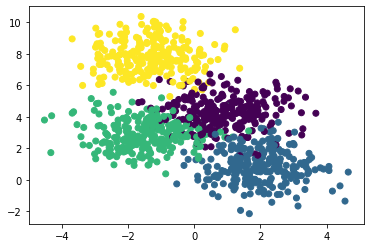

In [8]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

Converting the above data to data with only 2 labels

In [9]:
labels_orig=labels
labels=np.mod(labels_orig,2)

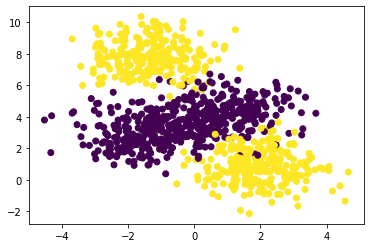

In [10]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

We construct a pandas dataframe from data and labels for data preprocessing.

In [11]:
df=pd.DataFrame(data,columns=["x1","x2"])
df['label']=labels
df.head()

,x1,x2,label
0,-2.508043,7.864081,1
1,0.466618,3.865713,0
2,-2.940626,8.564806,1
3,-2.899947,1.850140,0
4,2.344388,1.310534,1


#### Data Cleaning

Since this data is generated by sklearn library, there are no missing values. So data cleaning is essentially already complete. 

In [12]:
print("Missing values exist? ",df.isnull().values.any())

Missing values exist?  False


#### Data Analysis and Transformation

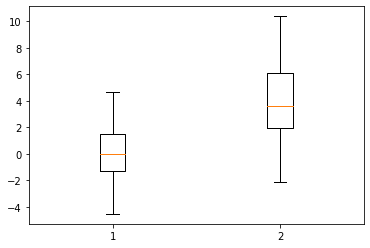

In [13]:
plt.boxplot([df["x1"],df["x2"]])
plt.show()

There are no outliers. But the ranges of the two features are different. We apply min-max transormation.

In [14]:
d=df[["x1","x2"]].values
scaler=MinMaxScaler()
scaler.fit(d)
d=scaler.transform(d)
df=pd.DataFrame(d,columns=["x1","x2"])
df['label']=labels
df.head()

,x1,x2,label
0,0.219543,0.799459,1
1,0.543891,0.480207,0
2,0.172375,0.855409,1
3,0.176811,0.319272,0
4,0.748637,0.276187,1


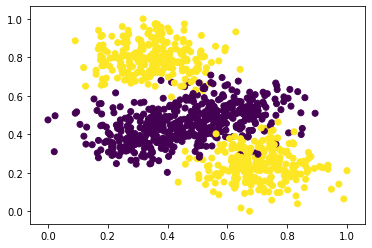

In [15]:
plt.scatter(d[:,0],d[:,1],c=labels)

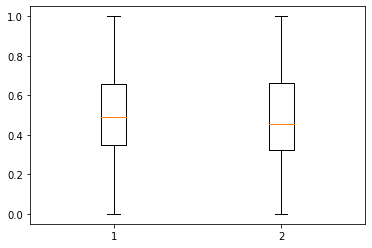

In [16]:
plt.boxplot([df["x1"],df["x2"]])
plt.show()

#### Fitting the neural network on the data

In [17]:
data=df[["x1","x2"]].values

In [18]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.25,stratify=labels,random_state=0)

In [20]:
fn=SFFN()

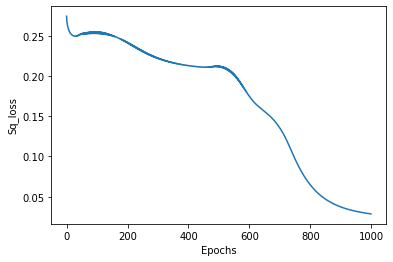

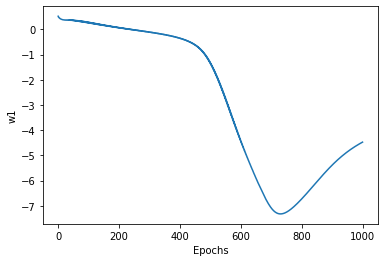

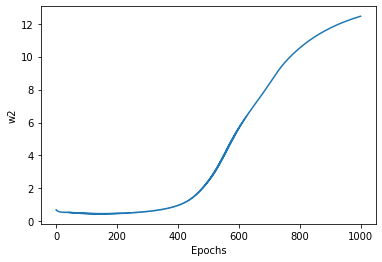

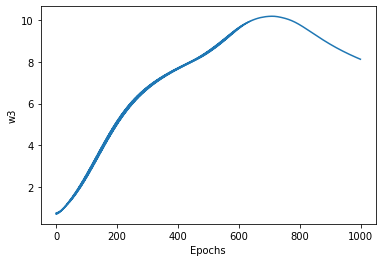

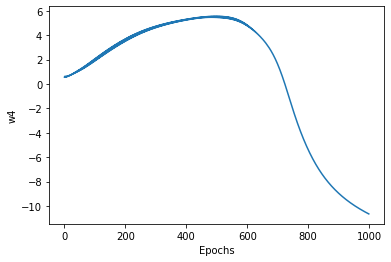

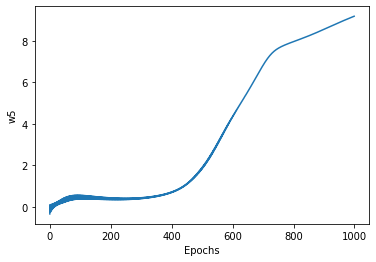

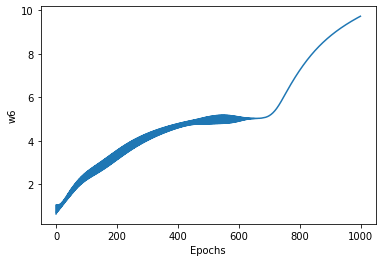

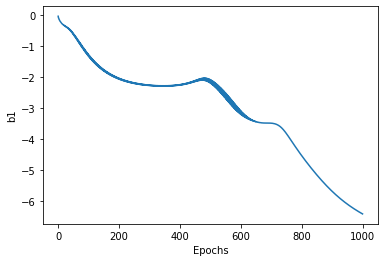

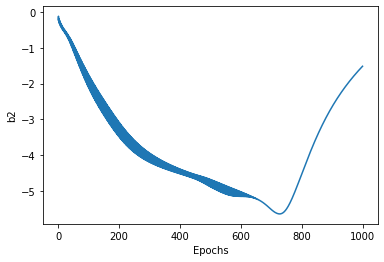

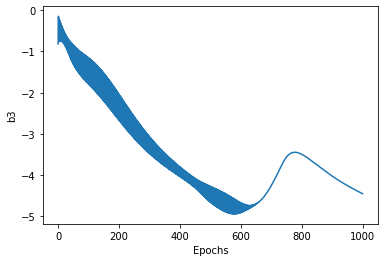

In [21]:
fn.fit(X_train,y_train,epochs=1000,lr=0.05,display_loss=1,display_param=1)

In [22]:
y_pred=fn.predict(X_test)
y_pred_b=(y_pred>=0.5).astype("int").ravel()

In [23]:
fn.score(y_pred_b,y_test)

0.952

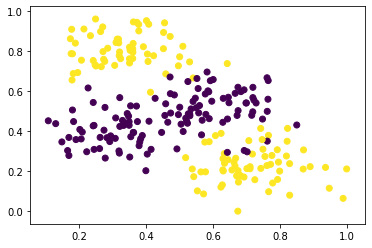

In [24]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

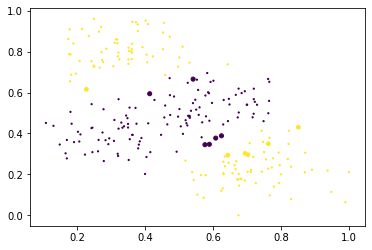

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_b,s=15*(np.abs(np.sign(y_test-y_pred_b)+0.1)))